In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_marketing_dataset.csv to bank_marketing_dataset.csv


In [ ]:
df = pd.read_csv('bank_marketing_dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
y = df['deposit']


In [ ]:
X = df.drop('deposit', axis=1)


In [ ]:
le = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [ ]:
y = le.fit_transform(y)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8051948051948052


In [ ]:
confusion_matrix(y_test, y_pred)


array([[867, 299],
       [136, 931]])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1166
           1       0.76      0.87      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.80      2233



In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

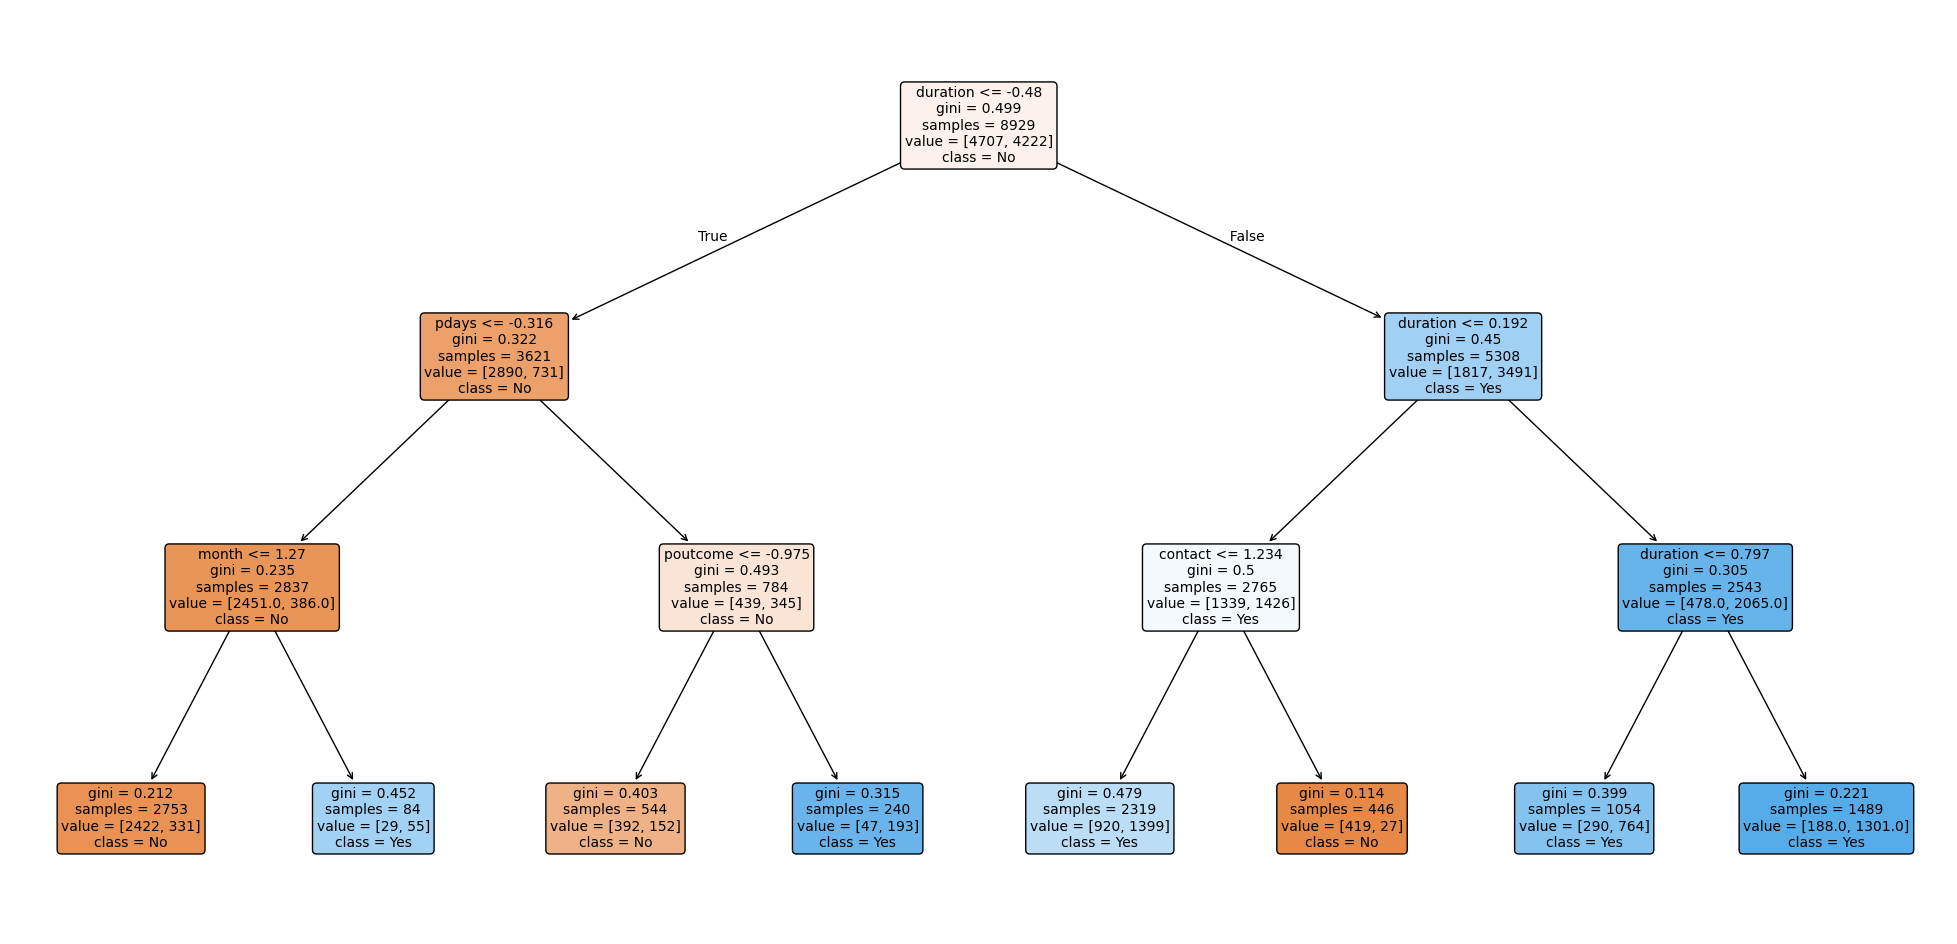

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 12))

plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.show()


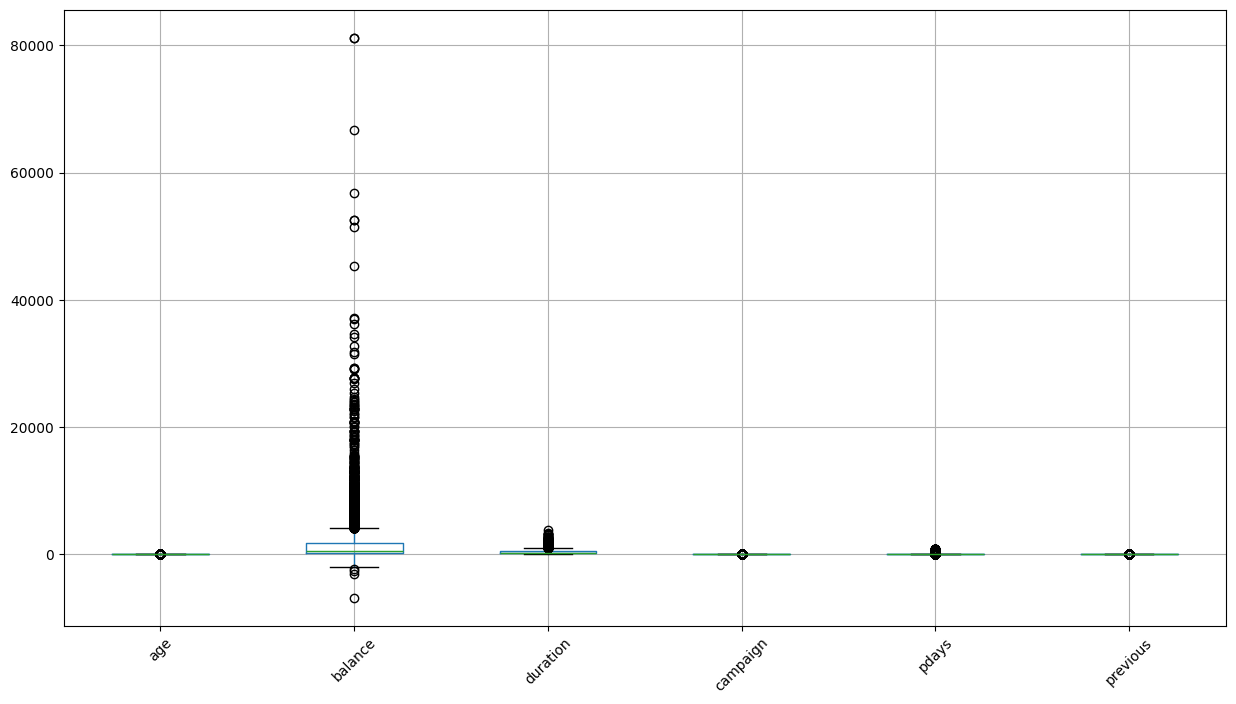

In [ ]:
import matplotlib.pyplot as plt

num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_clean = df.copy()

for col in ['age', 'balance', 'duration', 'campaign', 'previous']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]


In [ ]:
print("Before:", df.shape)
print("After :", df_clean.shape)


Before: (11162, 17)
After : (7812, 17)


In [ ]:
X_before = df.drop('deposit', axis=1)
y_before = df['deposit']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_before.select_dtypes(include='object').columns:
    X_before[col] = le.fit_transform(X_before[col])

y_before = le.fit_transform(y_before)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_before_scaled = scaler.fit_transform(X_before)


In [ ]:
from sklearn.model_selection import train_test_split

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_before_scaled, y_before, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_before = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_before.fit(Xb_train, yb_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_before = dt_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, y_pred_before)

print("Accuracy BEFORE outlier removal:", acc_before)


Accuracy BEFORE outlier removal: 0.8051948051948052


In [ ]:
X_after = df_clean.drop('deposit', axis=1)
y_after = df_clean['deposit']


In [ ]:
for col in X_after.select_dtypes(include='object').columns:
    X_after[col] = le.fit_transform(X_after[col])

y_after = le.fit_transform(y_after)


In [ ]:
X_after_scaled = scaler.fit_transform(X_after)


In [ ]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    X_after_scaled, y_after, test_size=0.2, random_state=42
)


In [ ]:
dt_after = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_after.fit(Xa_train, ya_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_after = dt_after.predict(Xa_test)
acc_after = accuracy_score(ya_test, y_pred_after)

print("Accuracy AFTER outlier removal:", acc_after)


Accuracy AFTER outlier removal: 0.7773512476007678


In [ ]:
print("Decision Tree Accuracy Comparison")
print("--------------------------------")
print(f"Before Outlier Removal : {acc_before:.4f}")
print(f"After Outlier Removal  : {acc_after:.4f}")


Decision Tree Accuracy Comparison
--------------------------------
Before Outlier Removal : 0.8052
After Outlier Removal  : 0.7774


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ya_test, y_pred_after)
cm




array([[779, 121],
       [227, 436]])

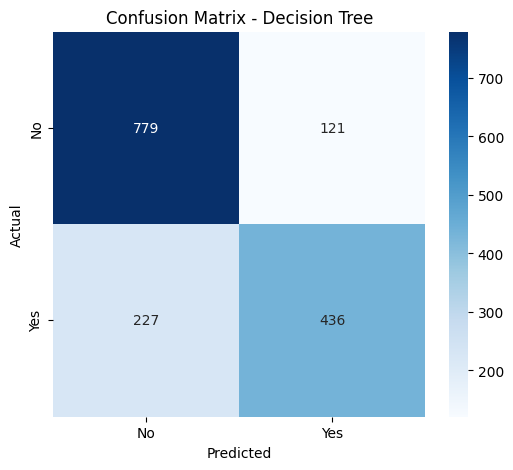

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ya_test, y_pred_after))


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       900
           1       0.78      0.66      0.71       663

    accuracy                           0.78      1563
   macro avg       0.78      0.76      0.77      1563
weighted avg       0.78      0.78      0.77      1563



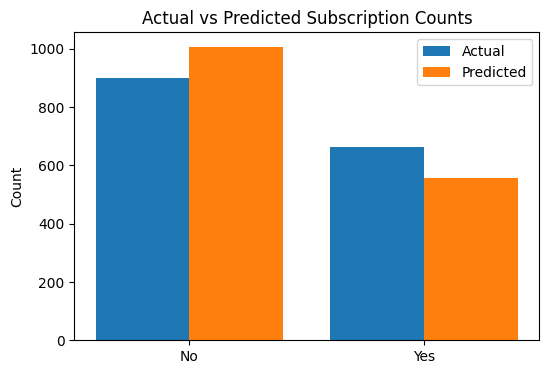

In [ ]:
import pandas as pd

actual_counts = pd.Series(ya_test).value_counts().sort_index()
pred_counts = pd.Series(y_pred_after).value_counts().sort_index()

labels = ['No', 'Yes']

x = range(len(labels))

plt.figure(figsize=(6,4))
plt.bar(x, actual_counts, width=0.4, label='Actual', align='center')
plt.bar([i + 0.4 for i in x], pred_counts, width=0.4, label='Predicted')

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Count")
plt.title("Actual vs Predicted Subscription Counts")
plt.legend()
plt.show()


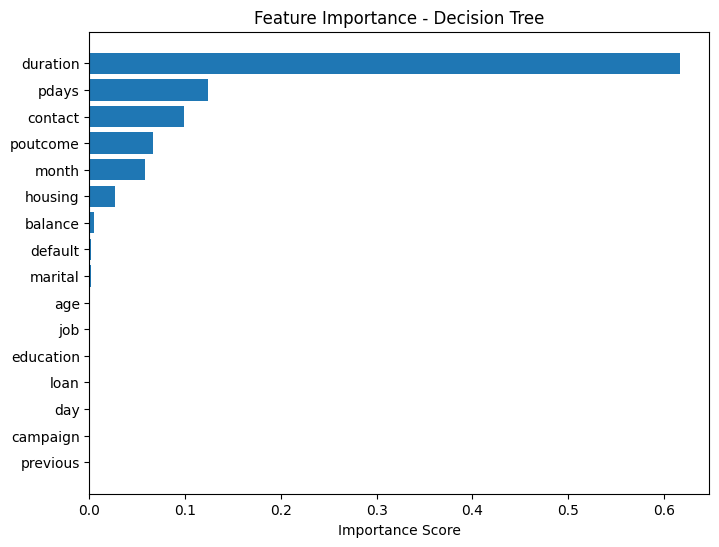

In [ ]:
importances = dt_after.feature_importances_
features = X_after.columns

fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.show()


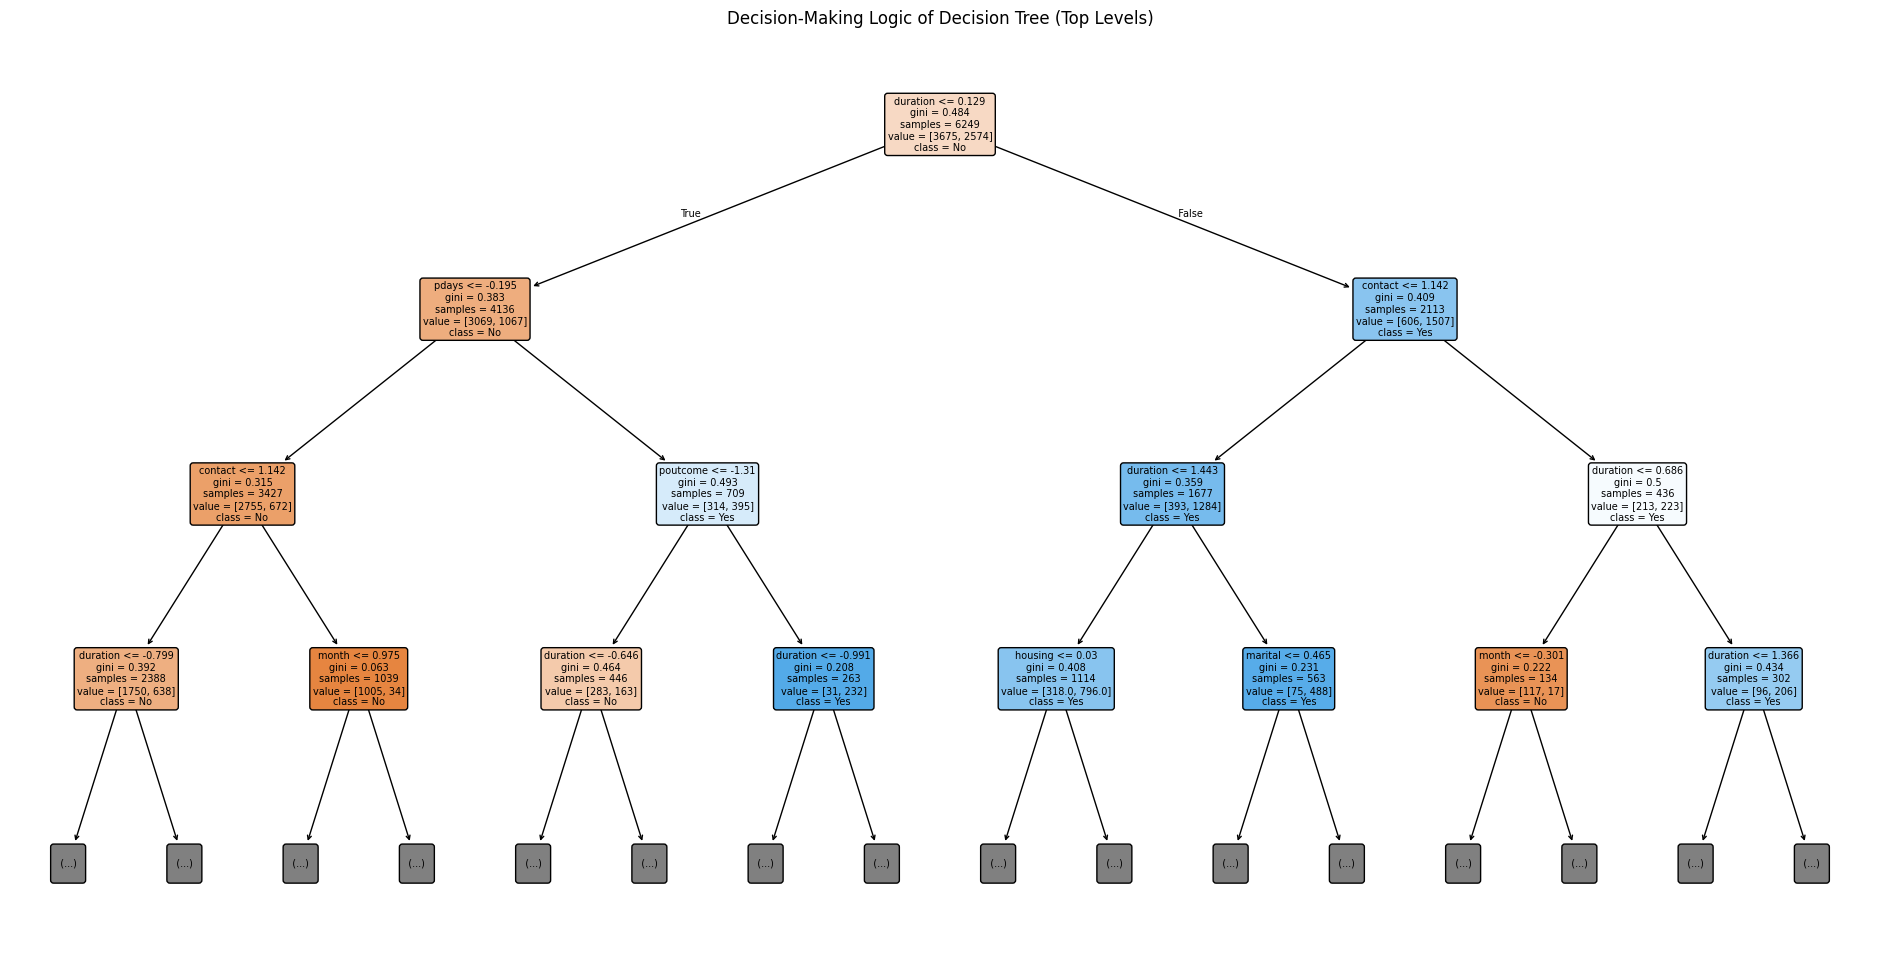

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))

plot_tree(
    dt_after,
    feature_names=X_after.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    max_depth=3
)

plt.title("Decision-Making Logic of Decision Tree (Top Levels)")
plt.show()


8.Interpret the learning rules in simple bussiness language

8. Customers who talk longer on the call usually say yes.

Calling the same customer too many times makes them say no.

People with more money in their account are more willing to invest.

Customers who invested earlier are more open to investing again.

Customers already paying loans hesitate to lock their money.

Mobile calls work better than other contact methods.

Recently contacted customers respond better than long-inactive ones.

9. Customer attribute at the top of the decision logic:
duration (call duration)

Why this attribute is important:
It directly reflects customer interest. Customers who stay longer on the call are more engaged, ask questions, and are more likely to agree to a term deposit.

10. Limiting tree depth prevents overfitting and improves generalization by keeping the decision rules simple and meaningful

11. This model is recommended because it provides transparent, explainable decisions, which are crucial in banking, unlike black-box models that lack interpretability.